In [3]:
#import libraries
import pandas as pd
import numpy as np

In [5]:
#get stock data
df=pd.read_csv('/kaggle/input/nsei-prev-data/in_nsei_daily.csv')
df['returns']=np.log(df.close.pct_change()+1)

In [7]:
#define a function to store lags of return data
def lagit(df, lags):
    names=[]
    for i in range(1,lags+1):
        df['Lag '+str(i)]=df['returns'].shift(i)
        names.append('Lag '+str(i))
    return names
lagnames=lagit(df,5)
df.dropna(inplace=True)
lagnames

['Lag 1', 'Lag 2', 'Lag 3', 'Lag 4', 'Lag 5']

In [10]:
#define model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(df[lagnames],df['returns'])
df['prediction']=model.predict(df[lagnames])
df['prediction']

6       0.000677
7       0.000200
8       0.001311
9       0.000327
10      0.000664
          ...   
1473    0.002300
1474   -0.001354
1475   -0.001009
1476    0.000057
1477   -0.001942
Name: prediction, Length: 1472, dtype: float64

In [12]:
#predict direction
df['direction']=[1 if i>0 else -1 for i in df.prediction]
df['strat']=df['direction']*df['returns']
np.exp(df[['returns','strat']].sum())

returns    2.199966
strat      2.486055
dtype: float64

<AxesSubplot:>

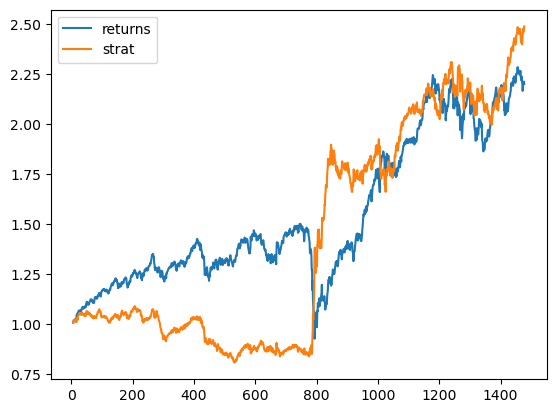

In [13]:
#plotting returns and strat, predicted is different
np.exp(df[['returns','strat']].cumsum()).plot()

In [16]:
#trying train test split, predicting data
from sklearn.model_selection import train_test_split
train,test=train_test_split(df, shuffle=False, test_size=0.3, random_state=0)
model=LinearRegression()
model.fit(train[lagnames],train['returns'])

LinearRegression()

returns    2.199966
strat      2.199034
dtype: float64


<AxesSubplot:>

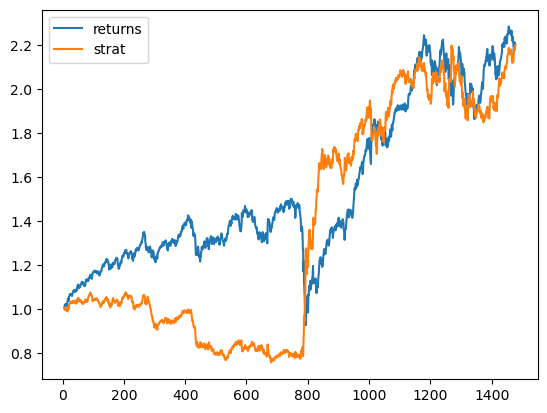

In [17]:
#plotting returns and strat, predicted is different
df['prediction']=model.predict(df[lagnames])
df['direction']=[1 if i>0 else -1 for i in df.prediction]
df['strat']=df['direction']*df['returns']
print(np.exp(df[['returns','strat']].sum()))
np.exp(df[['returns','strat']].cumsum()).plot()

In [18]:
(test['direction'].diff()!=0).value_counts()

False    264
True     178
Name: direction, dtype: int64